In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Reading and displaying the image

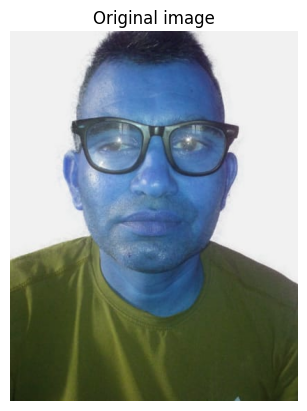

In [2]:

#reading image
img = cv2.imread("image.jpg")

#displaying image
plt.imshow(img)
plt.title("Original image")
plt.axis("off")
plt.show()

    Converting BgR TO rgb

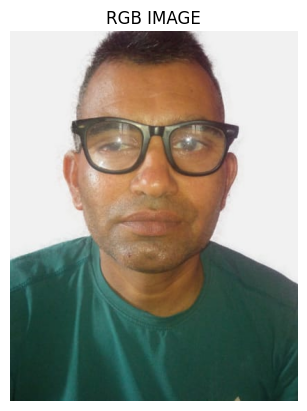

In [3]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("RGB IMAGE")
plt.axis("off")
plt.show()

In [4]:
print(img_rgb.shape)

(531, 413, 3)


Converting to grayscale image

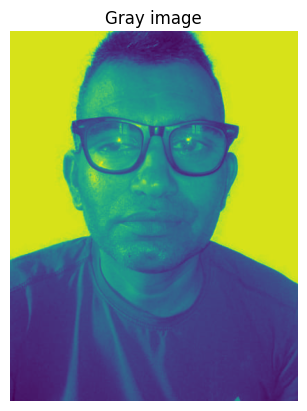

In [5]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title("Gray image")
plt.axis("off")
plt.show()

Resizing of the image

In [6]:
resized = cv2.resize(img , (224,224))
print(resized.shape)

(224, 224, 3)


normalization of the image

In [7]:
normalized = resized / 255
print(normalized.min(), normalized.max())

0.027450980392156862 0.996078431372549


Image blurring

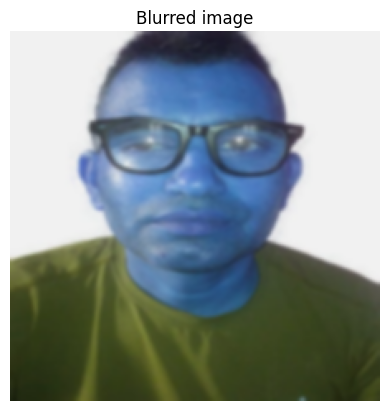

In [8]:
blur = cv2.GaussianBlur(resized, (5,5),0)
plt.imshow(blur)
plt.title("Blurred image")
plt.axis("off")
plt.show()

Tensorflow input format


In [9]:
input_image = np.expand_dims(normalized, axis=0)
print(input_image.shape)

(1, 224, 224, 3)


preprocessing pipeline


In [10]:
img_path = "image.jpg"
def preprocess(img_path):
    img= cv2.imread(img_path)
    img = cv2.cvtColor(cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    img= img/255
    return img

#Convert a raw image into a clean, standardized format that the model can understand.


Edge detection using the sobel operator


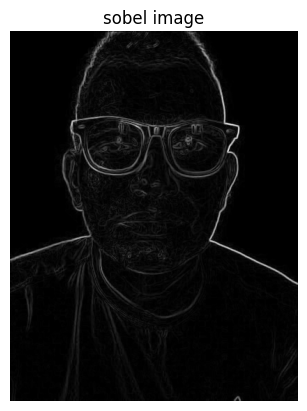

In [11]:
#vertical image
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1 , 0 ,ksize= 3)
#horizontal image
sobel_y= cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize = 3) 

#combine sobel_x and sobel_y
sobel_combined= cv2.magnitude(sobel_x, sobel_y)

plt.imshow(sobel_combined, cmap='gray')
plt.title("sobel image")
plt.axis("off")
plt.show()

Canny edge detection

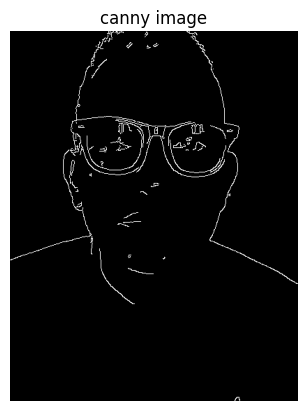

In [12]:
canny_edge = cv2.Canny(gray, threshold1=100 , threshold2=200)

plt.imshow(canny_edge, cmap="gray")
plt.title("canny image")
plt.axis("off")
plt.show()

Thresholding and binary images


Thresholding converts a grayscale image into a binary image (black and white).

Thresholding always works on grayscale images.

Global thresholding_

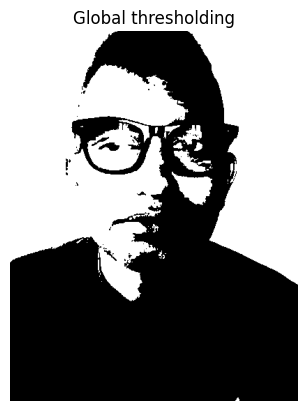

In [13]:
ret, thresh1 =  cv2.threshold(gray, 127 , 255 , cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap="gray")
plt.title("Global thresholding")
plt.axis("off")
plt.show()

Inverse thresholding

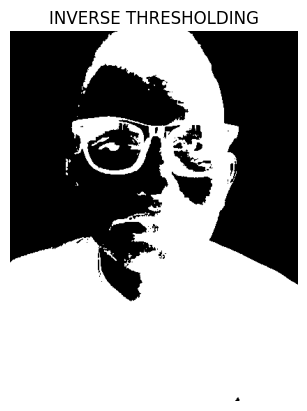

In [14]:
ret , thresh2 = cv2.threshold(gray, 127 , 255 , cv2.THRESH_BINARY_INV)
plt.imshow(thresh2, cmap = "gray")
plt.title("INVERSE THRESHOLDING")
plt.axis("off")
plt.show()

adaptive thresholding

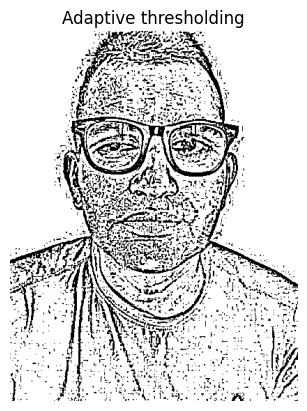

In [15]:
thresh_adapt = cv2.adaptiveThreshold(gray ,255,
                                      cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY,
                                      11,2)
plt.imshow(thresh_adapt, cmap="gray")
plt.title("Adaptive thresholding")
plt.axis("off")
plt.show()

Contours and shape detection

In [16]:
contours, heirarchy  = cv2.findContours(thresh1 , 
                                        cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_SIMPLE)
print(heirarchy)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [27 25 -1 -1]
  [28 26 -1 -1]
  [29 27 -1 -1]
  [30 28 -1 -1]
  [31 29 -1 -1]
  [32 30 -1 -1]
  [33 31 -1 -1]
  [34 32 -1 -1]
  [35 33 -1 -1]
  [36 34 -1 -1]
  [37 35 -1 -1]
  [38 36 -1 -1]
  [39 37 -1 -1]
  [40 38 -1 -1]
  [41 39 -1 -1]
  [42 40 -1 -1]
  [43 41 -1 -1]
  [44 42 -1 -1]
  [45 43 -1 -1]
  [46 44 -1 -1]
  [47 45 -1 -1]
  [48 46 -1 -1]
  [49 47 -1 -1]
  [50 48 -1 -1]
  [51 49 -1 -1]
  [-1 50 -1 -1]]]


Drawing contours

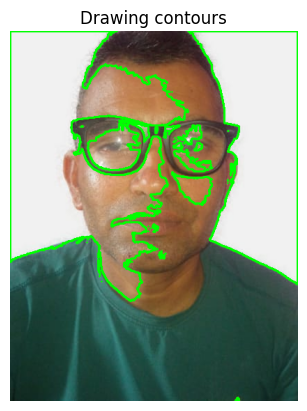

In [17]:
img_contours = img_rgb.copy()
cv2.drawContours(img_contours,
                 contours,
                 -1, #draw all contours
                 (0,255,0 ), #green
                 2)#thickness
plt.imshow(img_contours)
plt.title("Drawing contours")
plt.axis("off")
plt.show()

Contours area


In [18]:
for cnt in contours:
    area = cv2.contourArea(cnt)
print(cnt)

[[[  0   0]]

 [[  0 331]]

 [[  4 327]]

 ...

 [[149   1]]

 [[150   0]]

 [[153   0]]]


Filtering contours by area

<function matplotlib.pyplot.show(close=None, block=None)>

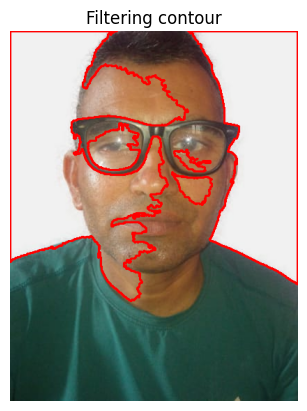

In [19]:
filtered_img = img_rgb.copy()

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 500 :
        cv2.drawContours(filtered_img, [cnt], -1 , (255,0,0), 2)
plt.imshow(filtered_img)
plt.axis("off")
plt.title("Filtering contour")
plt.show

Shape detection using contours

In [20]:
for cnt in contours:
    epilson = 0.04 * cv2.arcLength(cnt, True)
    #cv2.arcLength(cnt, True) calculates the perimeter of the contour.
    #epsilon controls how much the contour will be simplified.
    #0.04 means 4% of the contour’s perimeter.
    approx= cv2.approxPolyDP(cnt,epilson, True) #This function approximates the contour into a simpler polygon.
if len(approx)==3:
    shape = "Traingle"
elif len(approx)==4:
    shape = "Rectangle"
else:
    shape = " Circle"

cv2.drawContours(img_rgb, approx , -1 , (0,255,0), 2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [241, 241, 241],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[  0, 255,   0],
        [241, 241, 241],
        [241, 241, 241],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[241, 241, 241],
        [241, 241, 241],
        [241, 241, 241],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       ...,

       [[ 22,  42,  33],
        [ 22,  42,  33],
        [ 19,  39,  30],
        ...,
        [ 28,  63,  56],
        [ 28,  61,  54],
        [ 27,  58,  50]],

       [[ 21,  41,  32],
        [ 21,  41,  32],
        [ 19,  39,  30],
        ...,
        [ 27,  60,  53],
        [ 25,  58,  51],
        [ 25,  55,  47]],

       [[ 19,  39,  30],
        [ 19,  39,  30],
        [ 17,  37,  28],
        ...,
        [ 23,  56,  49],
        [ 22,  55,  48],
        [ 22,  52,  44]]

Morphological operations

Morphological operations modify the structure of objects in a binary image using a kernel (structuring element).

In [21]:
kernel= np.ones((5,5), np.uint8 )
#A kernel is a small matrix that slides over the image.

eroison 

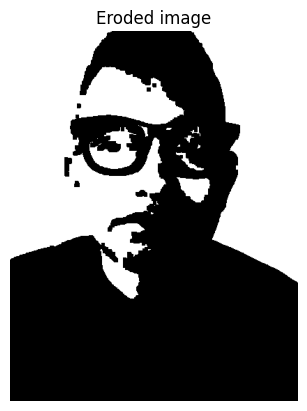

In [22]:
#erosion removes the small white noises
eroded = cv2.erode(thresh1 , kernel , iterations=1)
plt.imshow(eroded, cmap="gray")
plt.title("Eroded image")
plt.axis("off")
plt.show()

Dilation

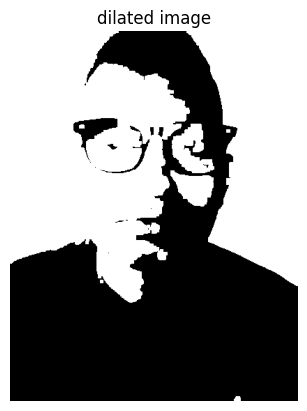

In [23]:
#Expands the white regions
dilated = cv2.dilate(thresh1, kernel, iterations=1)
plt.imshow(dilated, cmap="gray")
plt.title("dilated image")
plt.axis("off")
plt.show()

Opening Erosion to dilation

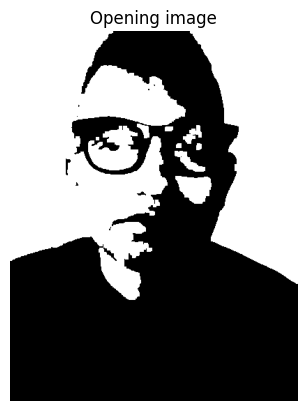

In [24]:

#0pening cleans the image by removing small foreground noise while keeping main objects.
opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap="gray")
plt.axis("off")
plt.title("Opening image")
plt.show()

Closing Dilation -> erosion


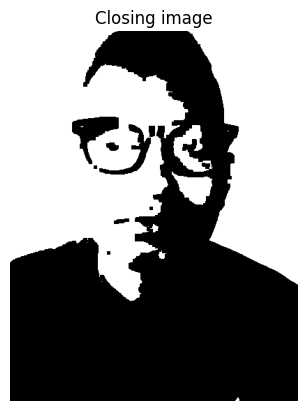

In [25]:
#Closing fills small holes and gaps in objects while preserving their overall shape.
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap="gray")
plt.axis("off")
plt.title("Closing image")
plt.show()

Face detection


Loading haar_cascade Classifier

In [29]:
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades +"haarcascade_frontalface_default.xml"
)
#This loads the pre-trained face detection model.

Detect faces

In [ ]:
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1, #Image is scaled down by 10% each step
    minNeighbors=5,  #Higher value = fewer false detections
    minSize=(10, 10)) #Ignore very small faces

Draw Boundary around the faces

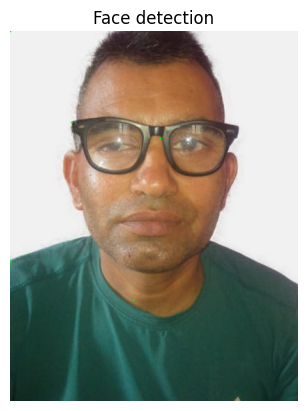

In [37]:
for (x,y,w,h)  in faces:
    cv2.rectangle(img_rgb, 
                  (x,y), 
                  (x+w, y+h), 
                  (0,255,0), 
                  2
                  )
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Face detection")
plt.show()